# CORDEX Regional Climate Projections

...

In [1]:
import geopandas as gpd
import xarray as xr

In [33]:
org_units = gpd.read_file('../test_data/sierra-leone-districts.geojson')
org_units

,type,id,name,hasCoordinatesDown,hasCoordinatesUp,level,grandParentParentGraph,grandParentId,parentGraph,parentId,parentName,dimensions,weight,geometry
0,Polygon,O6uvpzGd5pu,Bo,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-11.5914 8.4875, -11.5906 8.4769, -1..."
1,Polygon,fdc6uOvgoji,Bombali,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-11.8091 9.2032, -11.8102 9.1944, -1..."
2,MultiPolygon,lc3eMKXaEfw,Bonthe,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"MULTIPOLYGON (((-12.5568 7.3832, -12.5574 7.38..."
3,Polygon,jUb8gELQApl,Kailahun,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-10.7972 7.5866, -10.8002 7.5878, -1..."
4,MultiPolygon,PMa2VCrupOd,Kambia,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"MULTIPOLYGON (((-13.1349 8.8471, -13.1343 8.84..."
5,Polygon,kJq2mPyFEHo,Kenema,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-11.3596 8.5317, -11.3513 8.5234, -1..."
6,Polygon,qhqAxPSTUXp,Koinadugu,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-10.585 9.0434, -10.5877 9.0432, -10..."
7,Polygon,Vth0fbpFcsO,Kono,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-10.585 9.0434, -10.5848 9.0432, -10..."
8,MultiPolygon,jmIPBj66vD6,Moyamba,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"MULTIPOLYGON (((-12.6351 7.6613, -12.6346 7.66..."
9,MultiPolygon,TEQlaapDQoK,Port Loko,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"MULTIPOLYGON (((-13.119 8.4718, -13.1174 8.470..."


In [ ]:
# valid variable names
# - "2m_air_temperature",
# - "2m_relative_humidity",
# - "mean_precipitation_flux"

import earthkit.data
import json
import shutil
from pathlib import Path

def model_name_to_stub(name):
    return name.replace('-', '_').lower()

# low emission scenario
africa_rcp_2_6_models = {
    'MOHC-HadGEM2-ES': [
        'CLMcom-KIT-CCLM5-0-15',
        'GERICS-REMO2015',
        'ICTP-RegCM4-7',
    ],
    'MPI-M-MPI-ESM-MR': [
        'ICTP-RegCM4-7'
    ],
    'NCC-NorESM1-M': [
        'CLMcom-KIT-CCLM5-0-15',
        'GERICS-REMO2015',
        'ICTP-RegCM4-7',
    ],
    'MPI-M-MPI-ESM-LR': [
        'CLMcom-KIT-CCLM5-0-15',
        'GERICS-REMO2015',
    ]
}

# medium emission scenario
africa_rcp_4_5_models = {
    'CCCma-CanESM2': [
        'CCCma-CanRCM4',
    ],
}

# high emission scenario
africa_rcp_8_5_models = {
    'CCCma-CanESM2': [
        'CCCma-CanRCM4',
    ],
    'MOHC-HadGEM2-ES': [
        'CLMcom-KIT-CCLM5-0-15',
        'GERICS-REMO2015',
        'ICTP-RegCM4-7',
    ],
    'MPI-M-MPI-ESM-MR': [
        'ICTP-RegCM4-7',
    ],
    'NCC-NorESM1-M': [
        'CLMcom-KIT-CCLM5-0-15',
        'GERICS-REMO2015',
        'ICTP-RegCM4-7',
    ],
    'MPI-M-MPI-ESM-LR': [
        'CLMcom-KIT-CCLM5-0-15',
        'GERICS-REMO2015',
    ],
}

# lookup table
model_combinations = {
    'africa': {
        'rcp_2_6': africa_rcp_2_6_models,
        'rcp_4_5': africa_rcp_4_5_models,
        'rcp_8_5': africa_rcp_8_5_models,
    }
}

# TODO: rcm 'ICTP-RegCM4-7' uses yearly rather than 5-yearly downloads, need to handle differently... 
skip_rcms = ['ICTP-RegCM4-7']

allowed_start_years = list(range(2006, 2091+1, 5))
allowed_end_years = list(range(2010, 2095+1, 5))

def get_year_block(start_year, end_year, region, save_path, variables, scenario, resolution, gcm_model, rcm_model):
    # construct the query parameters
    params = {
        "domain": region,
        "experiment": scenario,
        "horizontal_resolution": resolution,
        "temporal_resolution": "daily_mean",
        "variable": variables,
        "gcm_model": model_name_to_stub(gcm_model),
        "rcm_model": model_name_to_stub(rcm_model),
        "ensemble_member": "r1i1p1",
        "start_year": [str(start_year)],
        "end_year": [str(end_year)],
    }

    # download the data
    print(f'Downloading climate projection data from CDS API...')
    print(f'Request parameters: \n{json.dumps(params)}')
    data = earthkit.data.from_source("cds",
        "projections-cordex-domains-single-levels",
        **params
    )

    print('Download finished:', data)
    shutil.copyfile(data.path, save_path)
    return save_path

def get(start_date, end_date, region, dirname, prefix, variables, scenario, resolution, gcm_model, rcm_model, overwrite=False):
    start_year = int(str(start_date)[:4])
    end_year = int(str(end_date)[:4])
    start_years = [str(y) for y in allowed_start_years if start_year <= y <= end_year]
    end_years = [str(y) for y in allowed_end_years if start_year <= y <= end_year]

    files = []
    for start_year, end_year in zip(start_years, end_years):
        print(f'Years {start_year} to {end_year}')
        out_path = Path(dirname).resolve() / f'{prefix}_{start_year}-{end_year}.nc'
        if overwrite is False and out_path.exists():
            print('File already exists, reusing from cache', out_path)
            files.append(out_path)
            continue
        else:
            file = get_year_block(start_year, end_year, region, out_path, variables, scenario, resolution, gcm_model, rcm_model)
            files.append(file)

    # return
    return files

start_year = 2021
end_year = 2030
dirname = '../test_outputs/cordex'
variables = ['2m_air_temperature']
region = 'africa'
scenarios = ['rcp_2_6', 'rcp_8_5']
resolution = '0_22_degree_x_0_22_degree'
files = []
for scenario in scenarios:
    for gcm_model,rcm_models in model_combinations['africa'][scenario].items():
        for rcm_model in rcm_models:
            prefix = f'cordex_temperature_{scenario}_{gcm_model}_{rcm_model}'
            print(prefix)
            if rcm_model in skip_rcms:
                print('Skipping RCM...')
                continue
            subfiles = get(start_year, end_year, region, dirname, prefix, variables, scenario, resolution, gcm_model, rcm_model)
            print(subfiles)
            files.extend(subfiles)

files

cordex_temperature_rcp_2_6_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15
Years 2021 to 2025
File already exists, reusing from cache C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_2_6_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15_2021-2025.nc
Years 2026 to 2030
File already exists, reusing from cache C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_2_6_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15_2026-2030.nc
[WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_2_6_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15_2021-2025.nc'), WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_2_6_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15_2026-2030.nc')]
cordex_temperature_rcp_2_6_MOHC-HadGEM2-ES_GERICS-REMO2015
Years 2021 to 2025
File already exists, reusing from cache C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_tempera

2026-02-06 20:40:52,298 INFO Request ID is ef1905d8-d7bb-4b70-8a56-2afcc059d4bb
2026-02-06 20:40:52,365 INFO status has been updated to accepted
2026-02-06 20:41:13,556 INFO status has been updated to running
2026-02-06 20:42:46,853 INFO status has been updated to successful


8719bc6e390bb629456e042ebc0d9ab5.zip:   0%|          | 0.00/566M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Download finished: NetCDFFieldListReader(C:\Users\karimba\AppData\Local\Temp\tmp2qwu9oj_\cds-bb5dc17bc006e304b2dfc6ea6fadbddbc168c5cea28bc15f52fe96b8f54fb6cc.d\tas_AFR-22_CCCma-CanESM2_rcp85_r1i1p1_CCCma-CanRCM4_r2_day_20210101-20251231.nc)
Years 2026 to 2030
Request parameters: 
{"domain": "africa", "experiment": "rcp_8_5", "horizontal_resolution": "0_22_degree_x_0_22_degree", "temporal_resolution": "daily_mean", "variable": ["2m_air_temperature"], "gcm_model": "cccma_canesm2", "rcm_model": "cccma_canrcm4", "ensemble_member": "r1i1p1", "start_year": ["2026"], "end_year": ["2030"]}


2026-02-06 20:44:35,378 INFO Request ID is 5b48a877-8b77-4cc6-b858-d2d27bf6b072
2026-02-06 20:44:35,457 INFO status has been updated to accepted
2026-02-06 20:44:49,175 INFO status has been updated to running
2026-02-06 20:46:29,936 INFO status has been updated to successful


cdcd343d9ede764a56a7c99bcb1edd91.zip:   0%|          | 0.00/565M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Download finished: NetCDFFieldListReader(C:\Users\karimba\AppData\Local\Temp\tmp2qwu9oj_\cds-373d1a57b32b9fd95b82c5e2a8b85880eb9c5f1460d69f77f0a3c58c94ae2051.d\tas_AFR-22_CCCma-CanESM2_rcp85_r1i1p1_CCCma-CanRCM4_r2_day_20260101-20301231.nc)
[WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_8_5_CCCma-CanESM2_CCCma-CanRCM4_2021-2025.nc'), WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_8_5_CCCma-CanESM2_CCCma-CanRCM4_2026-2030.nc')]
cordex_temperature_rcp_8_5_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15
Years 2021 to 2025
Request parameters: 
{"domain": "africa", "experiment": "rcp_8_5", "horizontal_resolution": "0_22_degree_x_0_22_degree", "temporal_resolution": "daily_mean", "variable": ["2m_air_temperature"], "gcm_model": "mohc_hadgem2_es", "rcm_model": "clmcom_kit_cclm5_0_15", "ensemble_member": "r1i1p1", "start_year": ["2021"], "end_year": ["2025"]}


2026-02-06 20:48:03,368 INFO Request ID is 61e8a94c-033d-4f6e-8980-2124c17dee35
2026-02-06 20:48:03,443 INFO status has been updated to accepted
2026-02-06 20:48:53,351 INFO status has been updated to running
2026-02-06 20:49:57,577 INFO status has been updated to successful


a8ee1f44dee96c94b592b6047ba1c291.zip:   0%|          | 0.00/581M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Download finished: File(CACHE:\cds-51a4b7dfa01da4d70283a715006e5fa519e67ca36511211a0d27a0ee9e8eb99e.d\tas_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20210101-20251230.nc,NetCDFReader)
Years 2026 to 2030
Request parameters: 
{"domain": "africa", "experiment": "rcp_8_5", "horizontal_resolution": "0_22_degree_x_0_22_degree", "temporal_resolution": "daily_mean", "variable": ["2m_air_temperature"], "gcm_model": "mohc_hadgem2_es", "rcm_model": "clmcom_kit_cclm5_0_15", "ensemble_member": "r1i1p1", "start_year": ["2026"], "end_year": ["2030"]}


2026-02-06 20:50:33,989 INFO Request ID is 1922325e-1d0e-49d5-bccb-01cd499126b7
2026-02-06 20:50:34,068 INFO status has been updated to accepted
2026-02-06 20:50:47,613 INFO status has been updated to running
2026-02-06 20:52:28,145 INFO status has been updated to successful


b111ed8e043c3c9f07ef54fd74934ee2.zip:   0%|          | 0.00/581M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Download finished: File(CACHE:\cds-4851e1397ae6cc724a28787fe53212279d3e0e6ee2134a6ddfa11cd3f9fd9ac3.d\tas_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20260101-20301230.nc,NetCDFReader)
[WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_8_5_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15_2021-2025.nc'), WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_8_5_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15_2026-2030.nc')]
cordex_temperature_rcp_8_5_MOHC-HadGEM2-ES_GERICS-REMO2015
Years 2021 to 2025
Request parameters: 
{"domain": "africa", "experiment": "rcp_8_5", "horizontal_resolution": "0_22_degree_x_0_22_degree", "temporal_resolution": "daily_mean", "variable": ["2m_air_temperature"], "gcm_model": "mohc_hadgem2_es", "rcm_model": "gerics_remo2015", "ensemble_member": "r1i1p1", "start_year": ["2021"], "end_year": ["2025"]}


2026-02-06 20:53:31,400 INFO Request ID is 9ff06fd5-85a6-46de-9fe5-5e422aec2f99
2026-02-06 20:53:31,484 INFO status has been updated to accepted
2026-02-06 20:53:39,914 INFO status has been updated to running
2026-02-06 20:54:47,042 INFO status has been updated to successful


4d38158e5bc5764b44a2b24550e8409e.zip:   0%|          | 0.00/595M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Download finished: NetCDFFieldListReader(C:\Users\karimba\AppData\Local\Temp\tmp2qwu9oj_\cds-8c045edf755b7e9830522b1f5fd98fd0d988c986b52f585d7468e43c4bc1b2a0.d\tas_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20210101-20251230.nc)
Years 2026 to 2030
Request parameters: 
{"domain": "africa", "experiment": "rcp_8_5", "horizontal_resolution": "0_22_degree_x_0_22_degree", "temporal_resolution": "daily_mean", "variable": ["2m_air_temperature"], "gcm_model": "mohc_hadgem2_es", "rcm_model": "gerics_remo2015", "ensemble_member": "r1i1p1", "start_year": ["2026"], "end_year": ["2030"]}


2026-02-06 20:56:42,101 INFO Request ID is ca19b03e-f04f-46b7-aee6-07a351054570
2026-02-06 20:56:42,221 INFO status has been updated to accepted
2026-02-06 20:56:55,792 INFO status has been updated to running
2026-02-06 20:57:57,759 INFO status has been updated to successful


41adfe1798b6ad74ef407a9b9714759a.zip:   0%|          | 0.00/595M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Download finished: NetCDFFieldListReader(C:\Users\karimba\AppData\Local\Temp\tmp2qwu9oj_\cds-691d5be430dbc7af04c5acad17386a072bc9d18f4562a1881ebdf7dc8f867ae3.d\tas_AFR-22_MOHC-HadGEM2-ES_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20260101-20301230.nc)
[WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_8_5_MOHC-HadGEM2-ES_GERICS-REMO2015_2021-2025.nc'), WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_8_5_MOHC-HadGEM2-ES_GERICS-REMO2015_2026-2030.nc')]
cordex_temperature_rcp_8_5_MOHC-HadGEM2-ES_ICTP-RegCM4-7
Skipping RCM...
cordex_temperature_rcp_8_5_MPI-M-MPI-ESM-MR_ICTP-RegCM4-7
Skipping RCM...
cordex_temperature_rcp_8_5_NCC-NorESM1-M_CLMcom-KIT-CCLM5-0-15
Years 2021 to 2025
Request parameters: 
{"domain": "africa", "experiment": "rcp_8_5", "horizontal_resolution": "0_22_degree_x_0_22_degree", "temporal_resolution": "daily_mean", "variable": ["2m_air_temperature"], "gcm_model": "ncc_n

2026-02-06 20:59:46,695 INFO Request ID is 9ded88f8-d998-4802-8b26-1e7b1ee11c11
2026-02-06 20:59:46,770 INFO status has been updated to accepted
2026-02-06 20:59:55,218 INFO status has been updated to running
2026-02-06 21:02:38,978 INFO status has been updated to successful


96e8420f173fbd55372c26185e274f9f.zip:   0%|          | 0.00/588M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Download finished: NetCDFFieldListReader(C:\Users\karimba\AppData\Local\Temp\tmp2qwu9oj_\cds-a32cc88d097baa6d67a5e3a05b6a9fa172ac6038490eccc35bc78c6658841d27.d\tas_AFR-22_NCC-NorESM1-M_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20210101-20251231.nc)
Years 2026 to 2030
Request parameters: 
{"domain": "africa", "experiment": "rcp_8_5", "horizontal_resolution": "0_22_degree_x_0_22_degree", "temporal_resolution": "daily_mean", "variable": ["2m_air_temperature"], "gcm_model": "ncc_noresm1_m", "rcm_model": "clmcom_kit_cclm5_0_15", "ensemble_member": "r1i1p1", "start_year": ["2026"], "end_year": ["2030"]}


2026-02-06 21:04:51,026 INFO Request ID is 773e04c7-8d2d-4e18-84c1-c32377112225
2026-02-06 21:04:51,105 INFO status has been updated to accepted
2026-02-06 21:05:04,763 INFO status has been updated to running
2026-02-06 21:05:41,613 INFO status has been updated to successful


37e348f4bfb721f05636e58bcda3d186.zip:   0%|          | 0.00/588M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Download finished: NetCDFFieldListReader(C:\Users\karimba\AppData\Local\Temp\tmp2qwu9oj_\cds-6022ad5bf36f59d3962b872f4480932fa3feff3ad63f6a554115693ac7d601c9.d\tas_AFR-22_NCC-NorESM1-M_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20260101-20301231.nc)
[WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_8_5_NCC-NorESM1-M_CLMcom-KIT-CCLM5-0-15_2021-2025.nc'), WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_8_5_NCC-NorESM1-M_CLMcom-KIT-CCLM5-0-15_2026-2030.nc')]
cordex_temperature_rcp_8_5_NCC-NorESM1-M_GERICS-REMO2015
Years 2021 to 2025
Request parameters: 
{"domain": "africa", "experiment": "rcp_8_5", "horizontal_resolution": "0_22_degree_x_0_22_degree", "temporal_resolution": "daily_mean", "variable": ["2m_air_temperature"], "gcm_model": "ncc_noresm1_m", "rcm_model": "gerics_remo2015", "ensemble_member": "r1i1p1", "start_year": ["2021"], "end_year": ["2025"]}


2026-02-06 21:07:06,295 INFO Request ID is b1485853-7c28-45e3-beac-f68db747336d
2026-02-06 21:07:06,366 INFO status has been updated to accepted
2026-02-06 21:07:56,183 INFO status has been updated to running
2026-02-06 21:09:00,381 INFO status has been updated to successful


bd427fd90040e1cc436bda9509a4df9a.zip:   0%|          | 0.00/599M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Download finished: NetCDFFieldListReader(C:\Users\karimba\AppData\Local\Temp\tmp2qwu9oj_\cds-025e0a28d7bac719d59f0d1ae32c2c556d2cb8ed19483108d0f5404cd09a6923.d\tas_AFR-22_NCC-NorESM1-M_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20210101-20251231.nc)
Years 2026 to 2030
Request parameters: 
{"domain": "africa", "experiment": "rcp_8_5", "horizontal_resolution": "0_22_degree_x_0_22_degree", "temporal_resolution": "daily_mean", "variable": ["2m_air_temperature"], "gcm_model": "ncc_noresm1_m", "rcm_model": "gerics_remo2015", "ensemble_member": "r1i1p1", "start_year": ["2026"], "end_year": ["2030"]}


2026-02-06 21:10:31,186 INFO Request ID is 33316c9f-6537-4250-b003-339f3b8bedf5
2026-02-06 21:10:31,261 INFO status has been updated to accepted
2026-02-06 21:10:44,909 INFO status has been updated to running
2026-02-06 21:11:46,954 INFO status has been updated to successful


b53b125e8884dd2b9ceabd219a147f21.zip:   0%|          | 0.00/599M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Download finished: NetCDFFieldListReader(C:\Users\karimba\AppData\Local\Temp\tmp2qwu9oj_\cds-c0f4c1a0aabe97010cff03c0a78dd1e2dd2d36764da3df92a099c4e420a8b4f3.d\tas_AFR-22_NCC-NorESM1-M_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20260101-20301231.nc)
[WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_8_5_NCC-NorESM1-M_GERICS-REMO2015_2021-2025.nc'), WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_8_5_NCC-NorESM1-M_GERICS-REMO2015_2026-2030.nc')]
cordex_temperature_rcp_8_5_NCC-NorESM1-M_ICTP-RegCM4-7
Skipping RCM...
cordex_temperature_rcp_8_5_MPI-M-MPI-ESM-LR_CLMcom-KIT-CCLM5-0-15
Years 2021 to 2025
Request parameters: 
{"domain": "africa", "experiment": "rcp_8_5", "horizontal_resolution": "0_22_degree_x_0_22_degree", "temporal_resolution": "daily_mean", "variable": ["2m_air_temperature"], "gcm_model": "mpi_m_mpi_esm_lr", "rcm_model": "clmcom_kit_cclm5_0_15", "ensemble_member": "r1i1p1"

2026-02-06 21:13:22,391 INFO Request ID is 099696c6-0c89-4aa8-b1c2-d5185203216a
2026-02-06 21:13:22,468 INFO status has been updated to accepted
2026-02-06 21:13:36,225 INFO status has been updated to running
2026-02-06 21:14:12,516 INFO status has been updated to successful


d579672c4e8b59630131b46e9306dda7.zip:   0%|          | 0.00/589M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Download finished: NetCDFFieldListReader(C:\Users\karimba\AppData\Local\Temp\tmp2qwu9oj_\cds-c741bad6a7e08e702eead0cd7d5f3133ec18ddc3922ec075ba950c20adecbd28.d\tas_AFR-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20210101-20251231.nc)
Years 2026 to 2030
Request parameters: 
{"domain": "africa", "experiment": "rcp_8_5", "horizontal_resolution": "0_22_degree_x_0_22_degree", "temporal_resolution": "daily_mean", "variable": ["2m_air_temperature"], "gcm_model": "mpi_m_mpi_esm_lr", "rcm_model": "clmcom_kit_cclm5_0_15", "ensemble_member": "r1i1p1", "start_year": ["2026"], "end_year": ["2030"]}


2026-02-06 21:15:28,954 INFO Request ID is c43e4f67-fb84-4fd9-8164-85959495ce3f
2026-02-06 21:15:29,026 INFO status has been updated to accepted
2026-02-06 21:15:42,862 INFO status has been updated to running
2026-02-06 21:16:44,893 INFO status has been updated to successful


426606591960ba2e5936dc783b2bc718.zip:   0%|          | 0.00/589M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Download finished: NetCDFFieldListReader(C:\Users\karimba\AppData\Local\Temp\tmp2qwu9oj_\cds-1576730e279c7734786fae7a92de8f3d7459a7e058d6eabd9fdf9f6837fa0c5d.d\tas_AFR-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20260101-20301231.nc)
[WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_8_5_MPI-M-MPI-ESM-LR_CLMcom-KIT-CCLM5-0-15_2021-2025.nc'), WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_8_5_MPI-M-MPI-ESM-LR_CLMcom-KIT-CCLM5-0-15_2026-2030.nc')]
cordex_temperature_rcp_8_5_MPI-M-MPI-ESM-LR_GERICS-REMO2015
Years 2021 to 2025
Request parameters: 
{"domain": "africa", "experiment": "rcp_8_5", "horizontal_resolution": "0_22_degree_x_0_22_degree", "temporal_resolution": "daily_mean", "variable": ["2m_air_temperature"], "gcm_model": "mpi_m_mpi_esm_lr", "rcm_model": "gerics_remo2015", "ensemble_member": "r1i1p1", "start_year": ["2021"], "end_year": ["2025"]}


2026-02-06 21:18:23,951 INFO Request ID is 3014b763-b910-45b4-a4fc-8598ba5cd07c
2026-02-06 21:18:24,038 INFO status has been updated to accepted
2026-02-06 21:18:37,776 INFO status has been updated to running
2026-02-06 21:19:39,793 INFO status has been updated to successful


c8c254407dc19d0d0d7b9943994515a8.zip:   0%|          | 0.00/600M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Download finished: NetCDFFieldListReader(C:\Users\karimba\AppData\Local\Temp\tmp2qwu9oj_\cds-5e5cc79c63dfba76599ab30556126e926030b0ff44a1e0d07a1f363978654233.d\tas_AFR-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20210101-20251231.nc)
Years 2026 to 2030
Request parameters: 
{"domain": "africa", "experiment": "rcp_8_5", "horizontal_resolution": "0_22_degree_x_0_22_degree", "temporal_resolution": "daily_mean", "variable": ["2m_air_temperature"], "gcm_model": "mpi_m_mpi_esm_lr", "rcm_model": "gerics_remo2015", "ensemble_member": "r1i1p1", "start_year": ["2026"], "end_year": ["2030"]}


2026-02-06 21:21:22,323 INFO Request ID is 790325d0-8524-4a86-b2e9-0ad94099216e
2026-02-06 21:21:22,448 INFO status has been updated to accepted
2026-02-06 21:21:36,447 INFO status has been updated to running
2026-02-06 21:23:16,974 INFO status has been updated to successful


35073f75d82038afe94456113bc536e0.zip:   0%|          | 0.00/601M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Download finished: NetCDFFieldListReader(C:\Users\karimba\AppData\Local\Temp\tmp2qwu9oj_\cds-e50a1b1b06a86a190571aebdda3496b1a00be15d2a07bd27926417532975c864.d\tas_AFR-22_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_GERICS-REMO2015_v1_day_20260101-20301231.nc)
[WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_8_5_MPI-M-MPI-ESM-LR_GERICS-REMO2015_2021-2025.nc'), WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_8_5_MPI-M-MPI-ESM-LR_GERICS-REMO2015_2026-2030.nc')]


[WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_2_6_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15_2021-2025.nc'),
 WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_2_6_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15_2026-2030.nc'),
 WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_2_6_MOHC-HadGEM2-ES_GERICS-REMO2015_2021-2025.nc'),
 WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_2_6_MOHC-HadGEM2-ES_GERICS-REMO2015_2026-2030.nc'),
 WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_2_6_NCC-NorESM1-M_CLMcom-KIT-CCLM5-0-15_2021-2025.nc'),
 WindowsPath('C:/Users/karimba/Documents/Github/dhis2eo/tests/test_outputs/cordex/cordex_temperature_rcp_2_6_NCC-NorESM1-M_CLMcom-KIT-CCLM5-0-15_2026-2030.nc'),
 WindowsPath('C:/Users/karimba/Documen

In [109]:
import cftime
import pandas as pd
import numpy as np

def extract_ymdh(t):
    """
    Extract year, month, day, hour from cftime, pandas, or numpy datetime.
    """
    if isinstance(t, cftime.datetime):
        return t.year, t.month, t.day, t.hour

    if isinstance(t, (np.datetime64, pd.Timestamp)):
        ts = pd.Timestamp(t)
        return ts.year, ts.month, ts.day, ts.hour

    raise TypeError(f"Unsupported time type: {type(t)}")

def normalize_calendar(ds, target_cal="365_day"):
    cal = (
        ds.time.encoding.get("calendar")
        or ds.time.attrs.get("calendar")
        or "standard"
    )

    print(f'Converting from calendar {cal} to {target_cal}')

    t0 = ds.time.values[0]
    year, month, day, hour = extract_ymdh(t0)

    norm_time = xr.cftime_range(
        start=cftime.datetime(
            year, month, day, hour, calendar=target_cal
        ),
        periods=ds.sizes["time"],
        freq="D",
        calendar=target_cal,
    )
    numpy_time = norm_time.to_datetimeindex()

    ds = ds.copy()
    ds["time"] = numpy_time
    ds.time.attrs["original_calendar"] = cal
    ds.time.encoding["calendar"] = target_cal

    return ds

# def subset_bbox(ds, xmin, ymin, xmax, ymax):
#     # subset to bbox
#     mask = (
#         (ds.lat >= ymin) & (ds.lat <= ymax) &
#         (ds.lon >= xmin)  & (ds.lon <= xmax)
#     ).compute()

#     ds_subset = ds.where(mask, drop=True)
#     return ds_subset

# precalc bbox mask
xmin,ymin,xmax,ymax = map(float, org_units.total_bounds)
ds = xr.open_dataset(files[0])
mask = (
    (ds.lat >= ymin) & (ds.lat <= ymax) &
    (ds.lon >= xmin)  & (ds.lon <= xmax)
).compute()

# collect and prep files before concat
datasets = []
for fil in files:
    print('-------->', fil)
    d = xr.open_dataset(fil, chunks={"time": 100})
    # need to normalize slightly different calendar definitions
    d = normalize_calendar(d)
    # make gcm-rcm combo a dimension that we can select on after concat
    gcm = d.model_id
    rcm = d.driving_model_id
    ensemble_id = f'{gcm}__{rcm}'
    d = d.assign_coords(ensemble=ensemble_id).expand_dims("ensemble")
    # make scenario a dimension that we can select on after concat
    scenario_id = d.experiment_id
    d = d.assign_coords(scenario=scenario_id).expand_dims("scenario")
    # subset to bbox
    subset = d.where(mask, drop=True).compute()
    # add to list
    datasets.append(subset)

--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_2_6_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15_2021-2025.nc
Converting from calendar 360_day to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_2_6_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15_2026-2030.nc
Converting from calendar 360_day to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_2_6_MOHC-HadGEM2-ES_GERICS-REMO2015_2021-2025.nc
Converting from calendar 360_day to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_2_6_MOHC-HadGEM2-ES_GERICS-REMO2015_2026-2030.nc
Converting from calendar 360_day to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_2_6_NCC-NorESM1-M_CLMcom-KIT-CCLM5-0-15_2021-2025.nc
Converting from calendar 365_day to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_2_6_NCC-NorESM1-M_CLMcom-KIT-CCLM5-0-15_2026-2030.nc
Converting from calendar 365_day to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_2_6_NCC-NorESM1-M_GERICS-REMO2015_2021-2025.nc
Converting from calendar proleptic_gregorian to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_2_6_NCC-NorESM1-M_GERICS-REMO2015_2026-2030.nc
Converting from calendar proleptic_gregorian to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_2_6_MPI-M-MPI-ESM-LR_CLMcom-KIT-CCLM5-0-15_2021-2025.nc
Converting from calendar standard to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_2_6_MPI-M-MPI-ESM-LR_CLMcom-KIT-CCLM5-0-15_2026-2030.nc
Converting from calendar standard to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_2_6_MPI-M-MPI-ESM-LR_GERICS-REMO2015_2021-2025.nc
Converting from calendar proleptic_gregorian to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_2_6_MPI-M-MPI-ESM-LR_GERICS-REMO2015_2026-2030.nc
Converting from calendar proleptic_gregorian to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_8_5_CCCma-CanESM2_CCCma-CanRCM4_2021-2025.nc
Converting from calendar 365_day to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_8_5_CCCma-CanESM2_CCCma-CanRCM4_2026-2030.nc
Converting from calendar 365_day to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_8_5_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15_2021-2025.nc
Converting from calendar 360_day to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_8_5_MOHC-HadGEM2-ES_CLMcom-KIT-CCLM5-0-15_2026-2030.nc
Converting from calendar 360_day to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_8_5_MOHC-HadGEM2-ES_GERICS-REMO2015_2021-2025.nc
Converting from calendar 360_day to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_8_5_MOHC-HadGEM2-ES_GERICS-REMO2015_2026-2030.nc
Converting from calendar 360_day to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_8_5_NCC-NorESM1-M_CLMcom-KIT-CCLM5-0-15_2021-2025.nc
Converting from calendar 365_day to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_8_5_NCC-NorESM1-M_CLMcom-KIT-CCLM5-0-15_2026-2030.nc
Converting from calendar 365_day to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_8_5_NCC-NorESM1-M_GERICS-REMO2015_2021-2025.nc
Converting from calendar proleptic_gregorian to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_8_5_NCC-NorESM1-M_GERICS-REMO2015_2026-2030.nc
Converting from calendar proleptic_gregorian to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_8_5_MPI-M-MPI-ESM-LR_CLMcom-KIT-CCLM5-0-15_2021-2025.nc
Converting from calendar standard to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_8_5_MPI-M-MPI-ESM-LR_CLMcom-KIT-CCLM5-0-15_2026-2030.nc
Converting from calendar standard to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_8_5_MPI-M-MPI-ESM-LR_GERICS-REMO2015_2021-2025.nc
Converting from calendar proleptic_gregorian to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


--------> C:\Users\karimba\Documents\Github\dhis2eo\tests\test_outputs\cordex\cordex_temperature_rcp_8_5_MPI-M-MPI-ESM-LR_GERICS-REMO2015_2026-2030.nc
Converting from calendar proleptic_gregorian to 365_day


C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:30: DeprecationWarning: cftime_range() is deprecated, please use xarray.date_range(..., use_cftime=True) instead.
  norm_time = xr.cftime_range(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  numpy_time = norm_time.to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\3253151052.py:38: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  numpy_time = norm_time.to_datetimeindex()


In [110]:
datasets[0]

<xarray.Dataset> Size: 7MB
Dimensions:       (scenario: 1, ensemble: 1, rlat: 14, rlon: 13, time: 1800,
                   bnds: 2)
Coordinates:
  * scenario      (scenario) <U5 20B 'rcp26'
  * ensemble      (ensemble) <U38 152B 'CLMcom-KIT-CCLM5-0-15__MOHC-HadGEM2-ES'
  * rlat          (rlat) float64 112B 6.93 7.15 7.37 7.59 ... 9.35 9.57 9.79
  * rlon          (rlon) float64 104B -13.09 -12.87 -12.65 ... -10.67 -10.45
  * time          (time) datetime64[ns] 14kB 2021-01-01T12:00:00 ... 2025-12-...
    lon           (rlat, rlon) float64 1kB -13.09 -12.87 ... -10.67 -10.45
    lat           (rlat, rlon) float64 1kB 6.93 6.93 6.93 ... 9.79 9.79 9.79
    height        float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    rotated_pole  (scenario, ensemble, rlat, rlon) object 1kB b'' b'' ... b''
    tas           (scenario, ensemble, time, rlat, rlon) float32 1MB 300.6 .....
    time_bnds     (scenario, ensemble, time, bnds, rlat, rlon) object 5MB 202...
Attributes: (12/26)
    title:                          CCLMcom-KIT-CCLM5-0-15 model output prepa...
    project_id:                     CORDEX
    CORDEX_domain:                  AFR-22
    driving_model_id:               MOHC-HadGEM2-ES
    experiment_id:                  rcp26
    driving_experiment_name:        rcp26
    ...                             ...
    comment:                        Please use the following reference for th...
    product:                        output
    frequency:                      day
    creation_date:                  2019-11-29-T11:13:21Z
    tracking_id:                    hdl:21.14103/d14daa20-c089-42a4-a605-7650...
    c3s_disclaimer:                 This data has been curated and prepared i...

In [111]:
# concat
ds = xr.concat(
    datasets, 
    dim="ensemble",
    compat="override",
    coords="minimal",
)
ds

C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\2565802458.py:2: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  ds = xr.concat(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\2565802458.py:2: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'rlon' ('rlon',) The recommendation is to set join explicitly for this case.
  ds = xr.concat(
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\2565802458.py:2: FutureWarning: In a future ve

<xarray.Dataset> Size: 692MB
Dimensions:                     (scenario: 2, ensemble: 26, rlat: 14, rlon: 13,
                                 time: 3651, bnds: 2, vertices: 4)
Coordinates:
  * scenario                    (scenario) <U5 40B 'rcp26' 'rcp85'
  * ensemble                    (ensemble) <U39 4kB 'CLMcom-KIT-CCLM5-0-15__M...
  * rlat                        (rlat) float64 112B 6.93 7.15 7.37 ... 9.57 9.79
  * rlon                        (rlon) float64 104B -13.09 -12.87 ... -10.45
  * time                        (time) datetime64[ns] 29kB 2021-01-01T12:00:0...
    lon                         (rlat, rlon) float64 1kB -13.09 ... -10.45
    lat                         (rlat, rlon) float64 1kB 6.93 6.93 ... 9.79 9.79
    height                      float64 8B 2.0
Dimensions without coordinates: bnds, vertices
Data variables:
    rotated_pole                (scenario, ensemble, rlat, rlon) object 76kB ...
    tas                         (scenario, ensemble, time, rlat, rlon) float32 138MB ...
    time_bnds                   (scenario, ensemble, time, bnds, rlat, rlon) object 553MB ...
    rotated_latitude_longitude  (scenario, ensemble, rlat, rlon) float64 76kB ...
    lat_vertices                (scenario, ensemble, rlat, rlon, vertices) float32 151kB ...
    lon_vertices                (scenario, ensemble, rlat, rlon, vertices) float32 151kB ...
Attributes: (12/26)
    title:                          CCLMcom-KIT-CCLM5-0-15 model output prepa...
    project_id:                     CORDEX
    CORDEX_domain:                  AFR-22
    driving_model_id:               MOHC-HadGEM2-ES
    experiment_id:                  rcp26
    driving_experiment_name:        rcp26
    ...                             ...
    comment:                        Please use the following reference for th...
    product:                        output
    frequency:                      day
    creation_date:                  2019-11-29-T11:13:21Z
    tracking_id:                    hdl:21.14103/d14daa20-c089-42a4-a605-7650...
    c3s_disclaimer:                 This data has been curated and prepared i...

In [114]:
# save to disk so can reuse later
ds.drop_vars(['time_bnds']).to_netcdf('../test_outputs/cordex/cordex_temperature_sierra_leone2.nc')

In [152]:
# load from disk
ds = xr.open_dataset('../test_outputs/cordex/cordex_temperature_sierra_leone2.nc')
ds

<xarray.Dataset> Size: 139MB
Dimensions:                     (scenario: 2, ensemble: 26, rlat: 14, rlon: 13,
                                 time: 3651, vertices: 4)
Coordinates:
  * scenario                    (scenario) <U5 40B 'rcp26' 'rcp85'
  * ensemble                    (ensemble) <U39 4kB 'CLMcom-KIT-CCLM5-0-15__M...
  * rlat                        (rlat) float64 112B 6.93 7.15 7.37 ... 9.57 9.79
  * rlon                        (rlon) float64 104B -13.09 -12.87 ... -10.45
  * time                        (time) object 29kB 2021-01-01 12:00:00 ... 20...
    lon                         (rlat, rlon) float64 1kB ...
    lat                         (rlat, rlon) float64 1kB ...
    height                      float64 8B ...
Dimensions without coordinates: vertices
Data variables:
    rotated_pole                (scenario, ensemble, rlat, rlon) |S8 76kB ...
    tas                         (scenario, ensemble, time, rlat, rlon) float32 138MB ...
    rotated_latitude_longitude  (scenario, ensemble, rlat, rlon) float64 76kB ...
    lat_vertices                (scenario, ensemble, rlat, rlon, vertices) float32 151kB ...
    lon_vertices                (scenario, ensemble, rlat, rlon, vertices) float32 151kB ...
Attributes: (12/26)
    title:                          CCLMcom-KIT-CCLM5-0-15 model output prepa...
    project_id:                     CORDEX
    CORDEX_domain:                  AFR-22
    driving_model_id:               MOHC-HadGEM2-ES
    experiment_id:                  rcp26
    driving_experiment_name:        rcp26
    ...                             ...
    comment:                        Please use the following reference for th...
    product:                        output
    frequency:                      day
    creation_date:                  2019-11-29-T11:13:21Z
    tracking_id:                    hdl:21.14103/d14daa20-c089-42a4-a605-7650...
    c3s_disclaimer:                 This data has been curated and prepared i...

In [153]:
# convert to celsius
ds['tas'] = ds.tas - 273.15

In [154]:
ds['time'] = ds.indexes["time"].to_datetimeindex()

C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\2726904630.py:1: FutureWarning: In a future version of xarray to_datetimeindex will default to returning a 'us'-resolution DatetimeIndex instead of a 'ns'-resolution DatetimeIndex. This warning can be silenced by explicitly passing the `time_unit` keyword argument.
  ds['time'] = ds.indexes["time"].to_datetimeindex()
C:\Users\karimba\AppData\Local\Temp\ipykernel_34108\2726904630.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  ds['time'] = ds.indexes["time"].to_datetimeindex()


In [155]:
# calc ensemble stats for scenarios
rcp_26 = ds.sel(scenario='rcp26')
rcp_26_mean = rcp_26.tas.mean(dim="ensemble")
rcp_26_min = rcp_26.tas.min(dim="ensemble")
rcp_26_max = rcp_26.tas.max(dim="ensemble")
rcp_85 = ds.sel(scenario='rcp85')
rcp_85_mean = rcp_85.tas.mean(dim="ensemble")
rcp_85_min = rcp_85.tas.min(dim="ensemble")
rcp_85_max = rcp_85.tas.max(dim="ensemble")

Stat 24.73433
Stat 25.51466
Stat 26.139145
Stat 24.495218
Stat 26.302307
Stat 27.83495


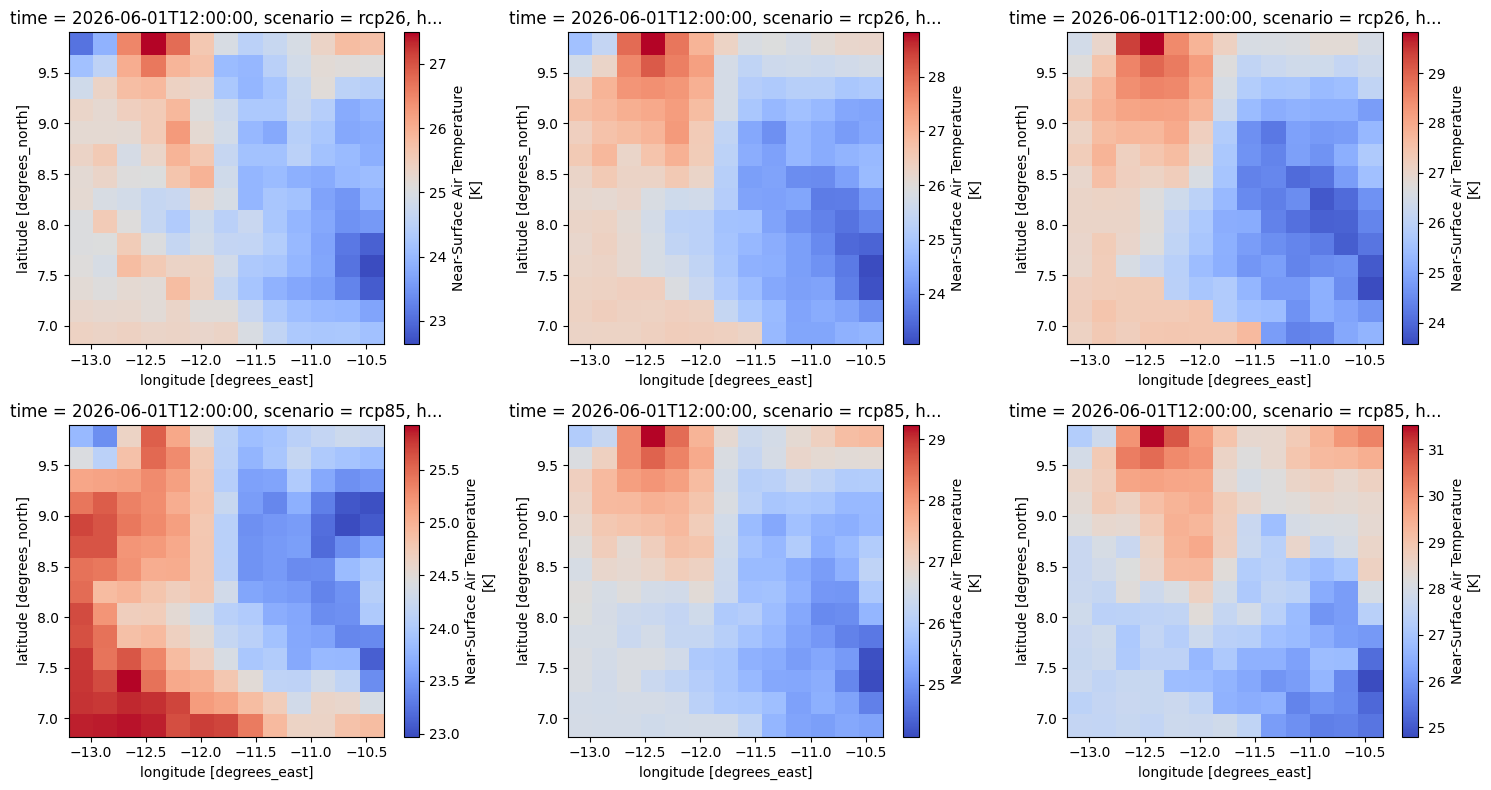

In [161]:
# make multiplot, 1 June 2026

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15,8))

# maps in order min, mean, max
date = '2026-06-01'
vars = [
    rcp_26_min, rcp_26_mean, rcp_26_max,
    rcp_85_min, rcp_85_mean, rcp_85_max,
]
for ax, d in zip(axes.flatten(), vars):
    print('Stat', d.sel(time=date).mean().values)
    d.sel(time=date).plot(ax=ax, x="lon", y="lat", cmap="coolwarm")
    #ax.set_title(stat)

plt.tight_layout()
plt.show()

Stat 24.83093
Stat 25.710737
Stat 26.841194
Stat 24.920944
Stat 25.587124
Stat 26.319803


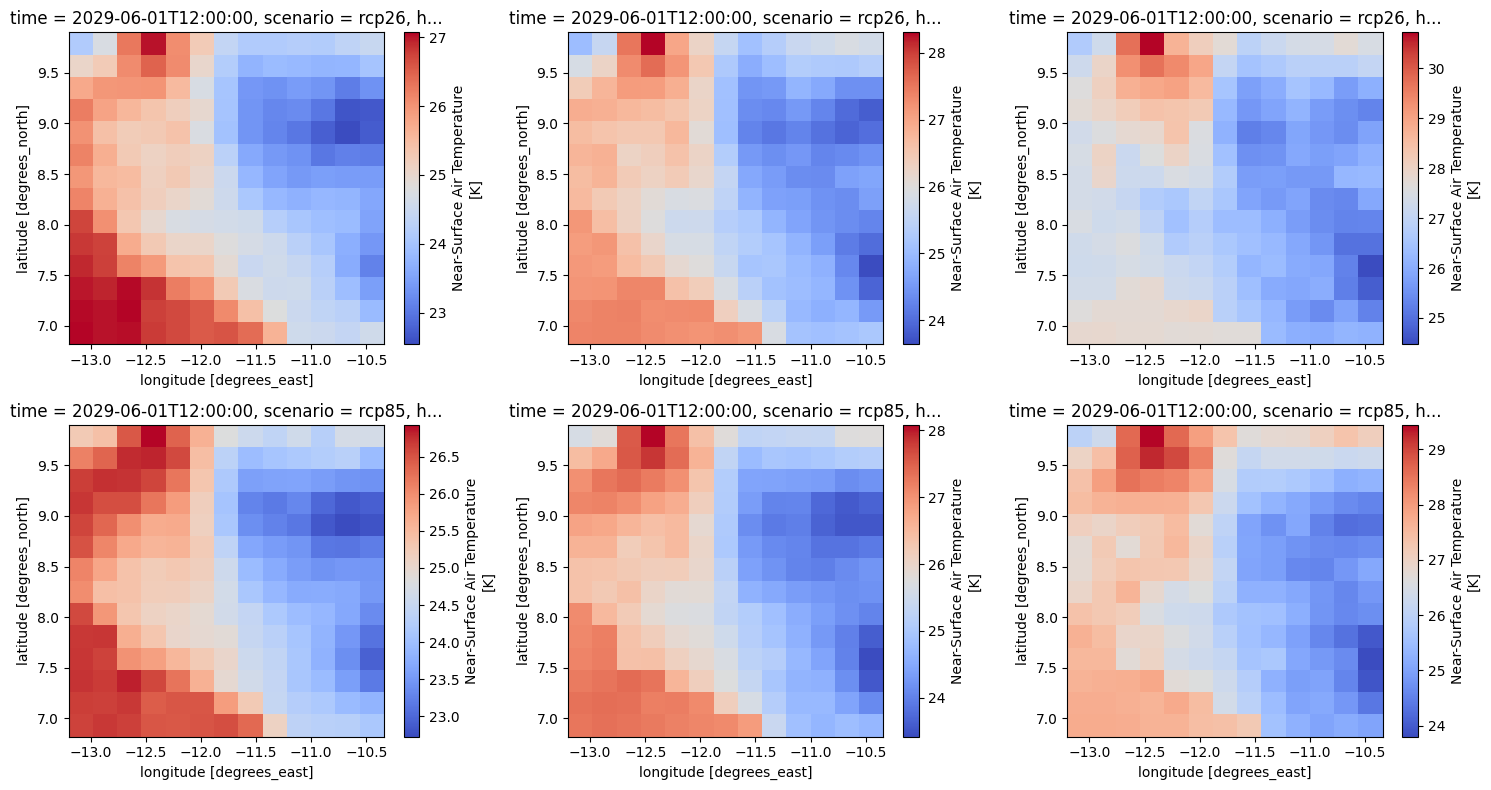

In [162]:
# make multiplot, 1 June 2030

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15,8))

# maps in order min, mean, max
date = '2029-06-01'
vars = [
    rcp_26_min, rcp_26_mean, rcp_26_max,
    rcp_85_min, rcp_85_mean, rcp_85_max,
]
for ax, d in zip(axes.flatten(), vars):
    print('Stat', d.sel(time=date).mean().values)
    d.sel(time=date).plot(ax=ax, x="lon", y="lat", cmap="coolwarm")
    #ax.set_title(stat)

plt.tight_layout()
plt.show()

In [156]:
rcp_26_mean.mean(dim=["rlat","rlon"]).groupby("time.year").count(dim="time").to_dataframe().reset_index()

,year,scenario,height,tas
0,2021,rcp26,2.0,365
1,2022,rcp26,2.0,365
2,2023,rcp26,2.0,365
3,2024,rcp26,2.0,365
4,2025,rcp26,2.0,365
5,2026,rcp26,2.0,365
6,2027,rcp26,2.0,365
7,2028,rcp26,2.0,365
8,2029,rcp26,2.0,365
9,2030,rcp26,2.0,365


In [159]:
# aggregate by year for whole country
rcp_26_mean_yr = rcp_26_mean.resample(time="Y").mean(dim="time").mean(dim=["rlat","rlon"]).compute()
rcp_26_min_yr = rcp_26_min.resample(time="Y").min(dim="time").mean(dim=["rlat","rlon"]).compute()
rcp_26_max_yr = rcp_26_max.resample(time="Y").max(dim="time").mean(dim=["rlat","rlon"]).compute()
rcp_85_mean_yr = rcp_85_mean.resample(time="Y").mean(dim="time").mean(dim=["rlat","rlon"]).compute()
rcp_85_min_yr = rcp_85_min.resample(time="Y").min(dim="time").mean(dim=["rlat","rlon"]).compute()
rcp_85_max_yr = rcp_85_max.resample(time="Y").max(dim="time").mean(dim=["rlat","rlon"]).compute()

c:\Users\karimba\AppData\Local\miniconda3\envs\climate-tools-py313\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
c:\Users\karimba\AppData\Local\miniconda3\envs\climate-tools-py313\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
c:\Users\karimba\AppData\Local\miniconda3\envs\climate-tools-py313\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
c:\Users\karimba\AppData\Local\miniconda3\envs\climate-tools-py313\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
c:\Users\karimba\AppData\Loc

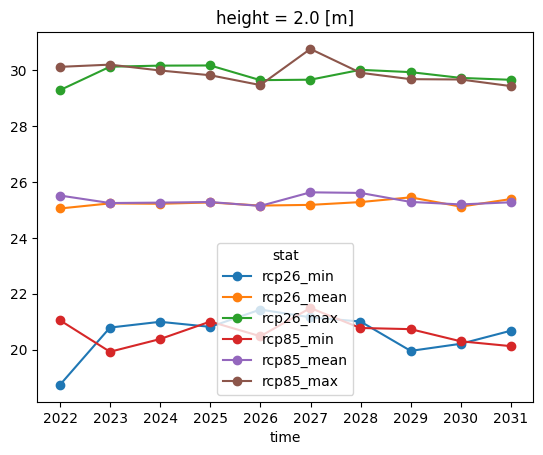

In [160]:
# plot min, mean, max
# should actually be -1 on year values, not sure why
tas_yr = xr.Dataset(
    {
        "rcp26_min": rcp_26_min_yr.drop_vars('scenario'),
        "rcp26_mean": rcp_26_mean_yr.drop_vars('scenario'),
        "rcp26_max": rcp_26_max_yr.drop_vars('scenario'),
        "rcp85_min": rcp_85_min_yr.drop_vars('scenario'),
        "rcp85_mean": rcp_85_mean_yr.drop_vars('scenario'),
        "rcp85_max": rcp_85_max_yr.drop_vars('scenario'),
    }
)
tas_yr.sel(time=slice('2020', '2030')).to_array("stat").plot(x="time", hue="stat", marker="o", linestyle="-")